# **MIMIC pneumonia patients data analysis and logistic regression**

Wrote by:\
Yitong Feng\
Hyogeon Kim

**Summary**

Pneumonia is an infection that inflames the air sacs in one or both lungs, causing cough with phlegm or pus, fever, chills, and difficulty breathing, which has been troubled human being for years already.
The objective of this analysis is to make data analysis on patients diagnosed with pneumonia, design a prediction algorithm using logistic regression and give the closest result. This dataset is originally from the MIMIC database. It contains data of male and female patients from age 19 to 89.


**Contents:**

1. Data analysis(Yitong)
*   Exploratory data analysis
*   Data visualization
2.  Linear Regression(Hyogeon)
*   Import libraries and loading the dataset
*   Basic operations to understand the dataset
*   Build a Linear Regression
*   Logistic Regression/ Splitting Data
*   Model Development & Training
*   Prediction
*   Model Evaluation









In [ ]:
#import library and load data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/patients with PNEUMONIA.csv")
data.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,637,674,F,2113-12-14 00:00:00,2195-02-17 00:00:00,2195-02-17 00:00:00,2195-02-17 00:00:00,1,830,674,...,Medicare,ENGL,JEWISH,MARRIED,WHITE,6/19/2193 18:06,6/19/2193 20:51,PNEUMONIA,0,1
1,664,705,M,2087-10-23 00:00:00,2156-08-26 00:00:00,2156-08-26 00:00:00,2156-08-26 00:00:00,1,869,705,...,Medicare,NaN,UNOBTAINABLE,NaN,ASIAN,8/22/2156 21:03,8/23/2156 4:32,PNEUMONIA,1,1
2,665,707,F,2026-04-05 00:00:00,2116-01-04 00:00:00,NaN,2116-01-04 00:00:00,1,870,707,...,Medicare,NaN,UNOBTAINABLE,SINGLE,WHITE,2/28/2115 16:38,2/28/2115 22:19,PNEUMONIA,0,1
3,669,711,M,2100-03-06 00:00:00,2185-05-26 00:00:00,NaN,2185-05-26 00:00:00,1,878,711,...,Medicare,ENGL,JEWISH,MARRIED,WHITE,3/22/2185 6:59,3/22/2185 11:14,PNEUMONIA,0,1
4,683,726,F,2046-09-03 00:00:00,2123-07-16 00:00:00,2123-07-16 00:00:00,2123-07-16 00:00:00,1,895,726,...,Medicare,NaN,NOT SPECIFIED,MARRIED,WHITE,7/1/2123 14:54,7/1/2123 20:15,PNEUMONIA,1,1


In [ ]:
# 1.1data overview
data.describe()

,ROW_ID,SUBJECT_ID,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19774.888000,24687.885000,0.665000,25508.516000,24687.885000,149999.458000,0.165000,0.989000
std,11272.786471,18158.488381,0.472227,14490.284071,18158.488381,28884.903681,0.371366,0.104355
min,61.000000,68.000000,0.000000,69.000000,68.000000,100030.000000,0.000000,0.000000
25%,10099.750000,10672.750000,0.000000,13050.250000,10672.750000,125618.500000,0.000000,1.000000
50%,20092.000000,21289.000000,1.000000,25987.500000,21289.000000,150052.000000,0.000000,1.000000
75%,29512.750000,31415.750000,1.000000,38203.750000,31415.750000,174600.500000,0.000000,1.000000
max,41904.000000,82211.000000,1.000000,53375.000000,82211.000000,199951.000000,1.000000,1.000000


In [ ]:
# 1.1data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                1000 non-null   int64 
 1   SUBJECT_ID            1000 non-null   int64 
 2   GENDER                1000 non-null   object
 3   DOB                   1000 non-null   object
 4   DOD                   665 non-null    object
 5   DOD_HOSP              464 non-null    object
 6   DOD_SSN               565 non-null    object
 7   EXPIRE_FLAG           1000 non-null   int64 
 8   ROW_ID.1              1000 non-null   int64 
 9   SUBJECT_ID.1          1000 non-null   int64 
 10  HADM_ID               1000 non-null   int64 
 11  ADMITTIME             1000 non-null   object
 12  DISCHTIME             1000 non-null   object
 13  DEATHTIME             165 non-null    object
 14  ADMISSION_TYPE        1000 non-null   object
 15  ADMISSION_LOCATION    1000 non-null   o

In [ ]:
# calculate the diagnosed age of patients with Pneumonia
data['DOB'] = pd.to_datetime(data['DOB']).dt.date
data['ADMITTIME'] = pd.to_datetime(data['ADMITTIME']).dt.date
data['age'] = data['ADMITTIME'].subtract(data['DOB'])
data['age'] = data['age'] // 365
data['age'] = data['age'].dt.days
data.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age
0,637,674,F,2113-12-14,2195-02-17 00:00:00,2195-02-17 00:00:00,2195-02-17 00:00:00,1,830,674,...,ENGL,JEWISH,MARRIED,WHITE,6/19/2193 18:06,6/19/2193 20:51,PNEUMONIA,0,1,79
1,664,705,M,2087-10-23,2156-08-26 00:00:00,2156-08-26 00:00:00,2156-08-26 00:00:00,1,869,705,...,NaN,UNOBTAINABLE,NaN,ASIAN,8/22/2156 21:03,8/23/2156 4:32,PNEUMONIA,1,1,68
2,665,707,F,2026-04-05,2116-01-04 00:00:00,NaN,2116-01-04 00:00:00,1,870,707,...,NaN,UNOBTAINABLE,SINGLE,WHITE,2/28/2115 16:38,2/28/2115 22:19,PNEUMONIA,0,1,88
3,669,711,M,2100-03-06,2185-05-26 00:00:00,NaN,2185-05-26 00:00:00,1,878,711,...,ENGL,JEWISH,MARRIED,WHITE,3/22/2185 6:59,3/22/2185 11:14,PNEUMONIA,0,1,85
4,683,726,F,2046-09-03,2123-07-16 00:00:00,2123-07-16 00:00:00,2123-07-16 00:00:00,1,895,726,...,NaN,NOT SPECIFIED,MARRIED,WHITE,7/1/2123 14:54,7/1/2123 20:15,PNEUMONIA,1,1,76


In [ ]:
#data clean
#check nulls and outliers(patients in their age over 120)
data = data.drop(data[data['age']>120].index)

Pneumonia influences a wide range of ages, including youngsters to mature and senior people. Above plot shows the most common age of patients is in range of 75 to 80 and the number of patients are up to 160.



In [ ]:
# extreme value of patients' age
data[data['age']==data['age'].max()]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age
720,35776,58794,F,2090-10-13,2179-11-30 00:00:00,2179-11-30 00:00:00,2179-11-30 00:00:00,1,45844,58794,...,ENGL,CATHOLIC,WIDOWED,WHITE,9/26/2179 14:45,9/26/2179 18:03,PNEUMONIA,0,1,89


In [ ]:
data[data['age']==data['age'].min()]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age
263,11191,11829,M,2088-04-03,NaN,NaN,NaN,0,14504,11829,...,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,PNEUMONIA,0,1,19
640,27950,29703,M,2181-07-12,2202-06-21 00:00:00,NaN,2202-06-21 00:00:00,1,36216,29703,...,ENGL,UNOBTAINABLE,SINGLE,WHITE,12/29/2200 11:00,12/30/2200 0:28,PNEUMONIA,0,1,19
715,25051,26542,M,2101-01-09,NaN,NaN,NaN,0,32476,26542,...,NaN,NOT SPECIFIED,SINGLE,WHITE,NaN,NaN,PNEUMONIA,0,1,19


In [ ]:
# 1.2Extreme Value of pneumonia patients on Ethnicity
from pandas.core.frame import DataFrame

max_age = data['age'].groupby(data['ETHNICITY']).max()
min_age = data['age'].groupby(data['ETHNICITY']).min()
avg_age = data['age'].groupby(data['ETHNICITY']).mean()

ethnicityGroup = {'ETHNICITY': max_age.index.to_list(),
        'max': max_age.to_list(),
        'min': min_age.to_list(),
        'avg': avg_age.to_list()}
extremeValue = DataFrame(ethnicityGroup)
extremeValue



In [ ]:
# average age of Pneumonia patients group by enthnicity
data['age'].groupby(data['ETHNICITY']).mean()

ETHNICITY
ASIAN                                         67.550000
ASIAN - CHINESE                               78.000000
BLACK/AFRICAN                                 78.000000
BLACK/AFRICAN AMERICAN                        61.247312
BLACK/CAPE VERDEAN                            70.666667
BLACK/HAITIAN                                 77.500000
HISPANIC OR LATINO                            59.642857
HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)    78.000000
HISPANIC/LATINO - PUERTO RICAN                61.666667
MIDDLE EASTERN                                79.000000
MULTI RACE ETHNICITY                          65.000000
OTHER                                         63.000000
PATIENT DECLINED TO ANSWER                    57.000000
PORTUGUESE                                    72.500000
UNABLE TO OBTAIN                              77.666667
UNKNOWN/NOT SPECIFIED                         68.769231
WHITE                                         66.359877
WHITE - RUSSIAN                       

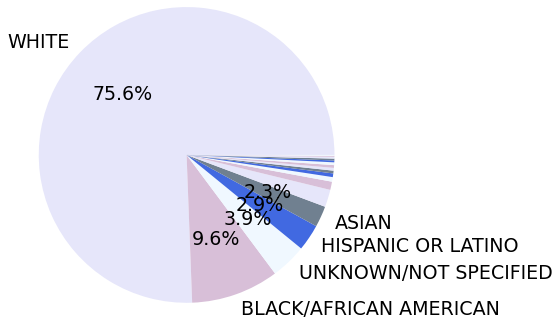

In [ ]:
# demographic information of patients--Ethnicity
# calculate number of patients by ethnicity 
ethnicityGroup=data['ETHNICITY'].value_counts()
colors=['lavender','thistle','aliceblue','royalblue','slategrey']

top5Group = ethnicityGroup.index.to_list()
for i in range(5, len(top5Group)):
  top5Group[i] = ''
# Do not show the labels with small pieces of data
def my_autopct(pct):
 return ('%.1f%%' % pct) if pct > 2 else ''
 
plt.pie(x=ethnicityGroup,
        colors=colors,
        autopct=my_autopct,
        labels=top5Group,
        pctdistance=0.6,
        labeldistance = 1.1,
        radius = 1.7,
        wedgeprops = {'linewidth': 2},
        textprops = {'fontsize':19 ,'color':'k'})
plt.show()

In [ ]:
patients = pd.read_csv("/content/PATIENTS.csv")
admissions = pd.read_csv("/content/ADMISSIONS.csv")

patients_admissions = pd.merge(patients, admissions, on='SUBJECT_ID')
patients_admissions

,ROW_ID_x,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID_y,HADM_ID,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1
1,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,322,149546,...,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,2155-02-03 17:43:00,2155-02-03 21:26:00,GI BLEED/ CHEST PAIN,0,1
2,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,323,158975,...,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1
3,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,324,124271,...,Self Pay,HAIT,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2188-11-12 06:56:00,2188-11-12 10:10:00,PNEUMONIA;R/O TB,1,1
4,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0,325,117937,...,Private,NaN,OTHER,NaN,UNKNOWN/NOT SPECIFIED,2110-07-27 05:00:00,2110-07-27 07:15:00,INTRACRANIAL HEAD BLEED,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0,41057,165748,...,Medicare,ENGL,GREEK ORTHODOX,MARRIED,WHITE,2111-09-29 18:35:00,2111-09-30 07:08:00,CHEST PAIN;ANGINA\LEFT HEART CATHETERIZATION,0,1
58972,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0,41058,163623,...,Private,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CHIARI MALFORMATION BILATERAL/SDA,0,1
58973,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1,41059,116395,...,Medicare,NaN,CATHOLIC,SEPARATED,WHITE,NaN,NaN,ABDOMINAL ANEURYSM; NO RUPTURE/SDA,1,1
58974,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0,41060,183530,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,SCOLIOSIS/SDA,0,1


In [ ]:
# see top 10 common disease occur with pneumonia
# extract patients' subject_id who diagnosed with Pneumonia
temp_data = patients_admissions[patients_admissions['SUBJECT_ID'].isin(data['SUBJECT_ID'].values.tolist())]
df1 = temp_data.groupby(['DIAGNOSIS'],as_index=False)['DIAGNOSIS'].agg({'cnt':'count'}) 
df1.sort_values('cnt', inplace=True, ascending=False)
df1[1:10]

,DIAGNOSIS,cnt
507,SEPSIS,65
147,CONGESTIVE HEART FAILURE,55
221,FEVER,37
36,ALTERED MENTAL STATUS,34
72,ASTHMA;COPD EXACERBATION,33
286,HYPOTENSION,29
522,SHORTNESS OF BREATH,29
199,DYSPNEA,24
459,RESPIRATORY FAILURE,23


In [ ]:
patients_admissions['DOB'] = pd.to_datetime(patients_admissions['DOB']).dt.date
patients_admissions['ADMITTIME'] = pd.to_datetime(patients_admissions['ADMITTIME']).dt.date
patients_admissions['age'] = patients_admissions['ADMITTIME'].subtract(patients_admissions['DOB'])
patients_admissions['age'] = patients_admissions['age'] // 365
patients_admissions['age'] = patients_admissions['age'].dt.days

In [ ]:
patients_admissions[['GENDER', 'age', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY']]

,GENDER,age,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY
0,F,74,Medicare,CATHOLIC,DIVORCED,WHITE
1,F,79,Medicare,CATHOLIC,DIVORCED,WHITE
2,F,81,Medicare,CATHOLIC,DIVORCED,WHITE
3,F,23,Self Pay,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN
4,M,20,Private,OTHER,NaN,UNKNOWN/NOT SPECIFIED
...,...,...,...,...,...,...
58971,M,85,Medicare,GREEK ORTHODOX,MARRIED,WHITE
58972,F,36,Private,CATHOLIC,MARRIED,WHITE
58973,F,85,Medicare,CATHOLIC,SEPARATED,WHITE
58974,F,52,Private,NOT SPECIFIED,MARRIED,WHITE


In [ ]:
from pandas.core.frame import DataFrame

max_age = data['age'].groupby(data['ETHNICITY']).max()
min_age = data['age'].groupby(data['ETHNICITY']).min()
avg_age = data['age'].groupby(data['ETHNICITY']).mean()

testdata = {'ETHNICITY': max_age.index.to_list(),
         'max': max_age.to_list(),
         'min': min_age.to_list(),
         'avg': avg_age.to_list()}
df = DataFrame(testdata)
df

,ETHNICITY,max,min,avg
0,ASIAN,300,43,97.869565
1,ASIAN - CHINESE,302,69,122.800000
2,BLACK/AFRICAN,84,70,78.000000
3,BLACK/AFRICAN AMERICAN,304,23,68.781250
4,BLACK/CAPE VERDEAN,88,55,70.666667
5,BLACK/HAITIAN,79,76,77.500000
6,HISPANIC OR LATINO,300,28,67.931034
7,HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),78,78,78.000000
8,HISPANIC/LATINO - PUERTO RICAN,66,52,61.666667
9,MIDDLE EASTERN,300,79,189.500000


In [ ]:
sns.pairplot(data, hue='DIAGNOSIS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


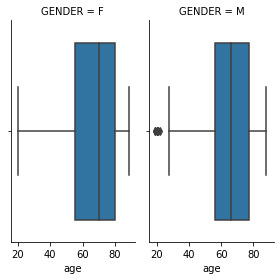

In [ ]:

sns.factorplot(x='age',
               col='GENDER',data=data,kind='box',size=4,aspect=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


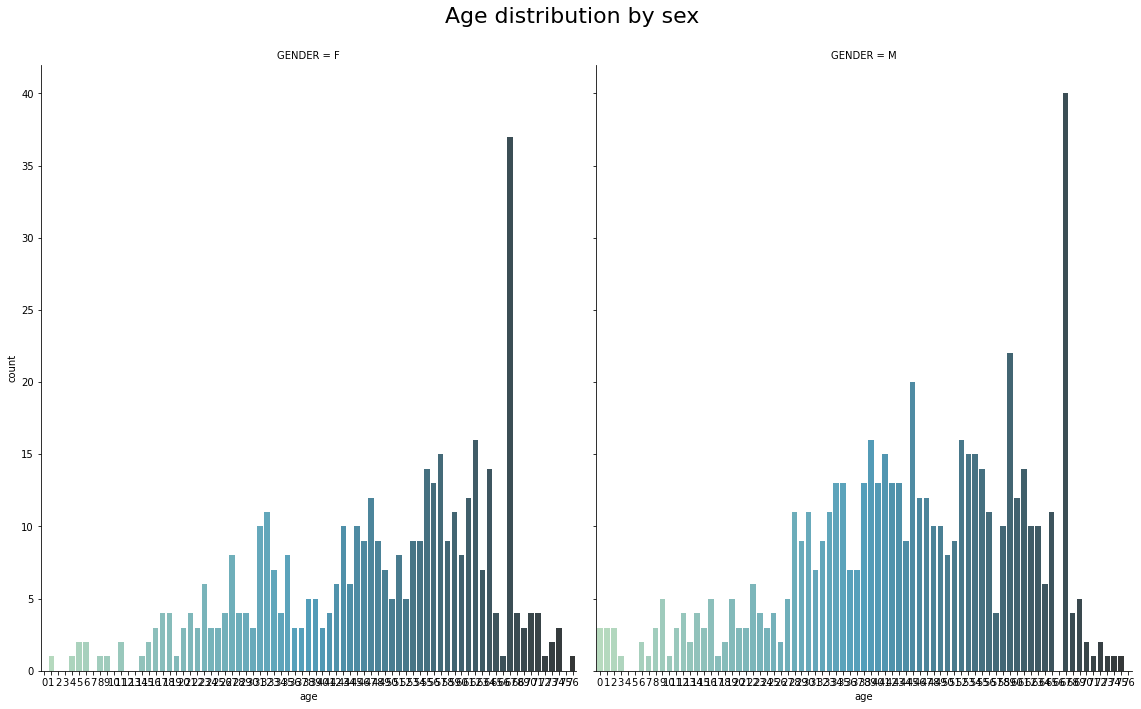

In [ ]:
# age distribution by sex
agePeople=data['age'].value_counts()
g = sns.factorplot(x="age", col="GENDER",data=data, kind="count",size=10, aspect=0.8,palette="GnBu_d");
g.set_xticklabels(np.arange(0,100));
# g.set_xticklabels(step=10);
g.fig.suptitle('Age distribution by sex',fontsize=22);
g.fig.subplots_adjust(top=.9)

In [ ]:
#calculate number of patients of pneumonia
agePeople=data['age'].value_counts()
agePeople

82    33
68    30
78    28
85    26
84    26
      ..
29     1
33     1
22     1
23     1
89     1
Name: age, Length: 67, dtype: int64

In [ ]:
patients = pd.read_csv("/content/PATIENTS.csv")
icustays = pd.read_csv("/content/ICUSTAYS.csv")

patients_icustays = pd.merge(data, icustays , on='SUBJECT_ID')
patients_icustays


In [ ]:
patients_icustays['LOS'] = patients_icustays['LOS'].round(0)
patients_icustays = patients_icustays.drop(patients_icustays[patients_icustays['LOS']>10].index)
patients_icustays['LOS'].describe()

count    2402.000000
mean        2.943381
std         2.225547
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: LOS, dtype: float64

Text(0.5, 1.0, 'Comparaison of LOS between female and male')

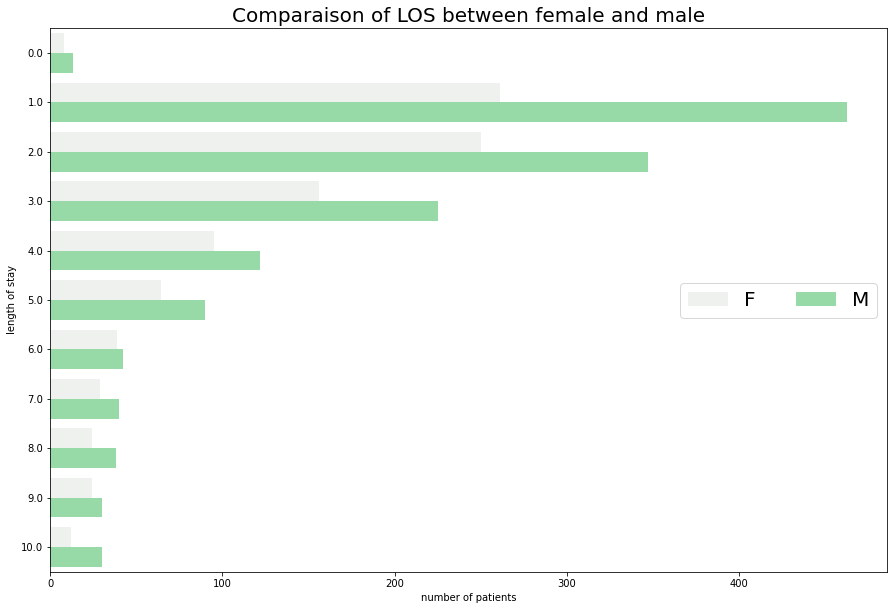

In [ ]:
#  LOS in ICU of patients diagnosed with pneumonia in different age groups among gender
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='LOS',hue='GENDER', data=patients_icustays, ax=ax,color='g')
sns.set_color_codes("muted")

ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="length of stay",xlabel="number of patients")
ax.set_title("Comparaison of LOS between female and male",fontsize=20) 




(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Text major ticklabel objects>)

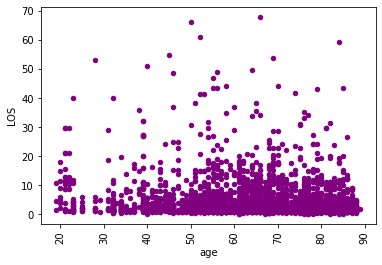

In [ ]:
# Age distribition on Length of Stay
patients_icustays.plot.scatter(x='age', y='LOS',color="purple")
plt.xticks(rotation=90)

<function matplotlib.pyplot.show>

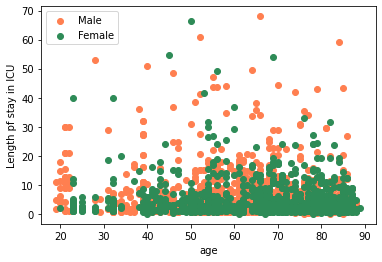

In [ ]:
#Age distribition among sex on Length of Stay
#Indicate what data each color represents
x_male=patients_icustays['age'].loc[patients_icustays['GENDER']=='M']
y_male=patients_icustays['LOS'].loc[patients_icustays['GENDER']=='M']
x_female=patients_icustays['age'].loc[patients_icustays['GENDER']=='F']
y_female=patients_icustays['LOS'].loc[patients_icustays['GENDER']=='F']

fig,ax=plt.subplots()
# set form of graph
ax.scatter(x_male,y_male, c='coral',label='Male')
ax.scatter(x_female,y_female, c='seagreen',label='Female')
ax.set_xlabel('age')
ax.set_ylabel('Length pf stay in ICU')

ax.legend()
plt.show

<function matplotlib.pyplot.show>

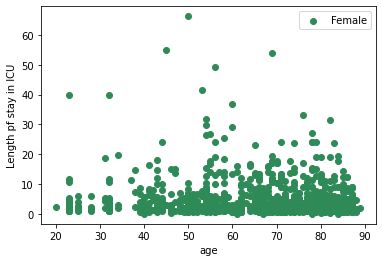

In [ ]:
#Age distribition among sex on Length of Stay
#Indicate what data each color represents
x_male=patients_icustays['age'].loc[patients_icustays['GENDER']=='M']
y_male=patients_icustays['LOS'].loc[patients_icustays['GENDER']=='M']
x_female=patients_icustays['age'].loc[patients_icustays['GENDER']=='F']
y_female=patients_icustays['LOS'].loc[patients_icustays['GENDER']=='F']

fig,ax=plt.subplots()
# set form of graph
ax.scatter(x_female,y_female, c='seagreen',label='Female')

ax.set_xlabel('age')
ax.set_ylabel('Length pf stay in ICU')

ax.legend()
plt.show

<function matplotlib.pyplot.show>

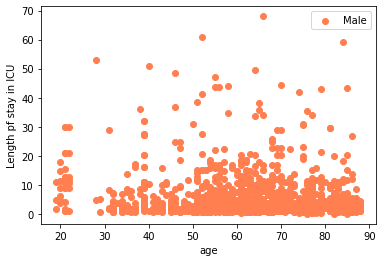

In [ ]:
#Age distribition among sex on Length of Stay
#Indicate what data each color represents
x_male=patients_icustays['age'].loc[patients_icustays['GENDER']=='M']
y_male=patients_icustays['LOS'].loc[patients_icustays['GENDER']=='M']
x_female=patients_icustays['age'].loc[patients_icustays['GENDER']=='F']
y_female=patients_icustays['LOS'].loc[patients_icustays['GENDER']=='F']

fig,ax=plt.subplots()
# set form of graph
ax.scatter(x_male,y_male, c='coral',label='Male')

ax.set_xlabel('age')
ax.set_ylabel('Length pf stay in ICU')

ax.legend()
plt.show

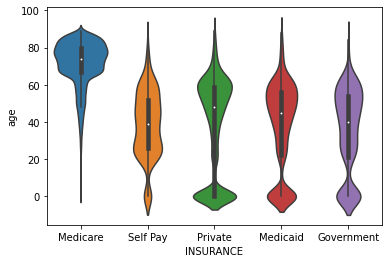

In [ ]:
patients_admissions = patients_admissions.drop(patients_admissions[patients_admissions['age']>120].index)
import seaborn as sns
import matplotlib.pyplot as plt
insuranceNum=patients_admissions['INSURANCE'].value_counts()

sns.violinplot(x=patients_admissions["INSURANCE"], y=patients_admissions["age"])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd
# 创建数据
df = pd.DataFrame({'nb_people': [8, 3, 4, 2], 'group': ["group A", "group B", "group C", "group D"]})
# 绘图显示
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
patients_admissions.describe()

,ROW_ID_x,SUBJECT_ID,EXPIRE_FLAG,ROW_ID_y,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,22958.439043,33755.583288,0.382969,29488.500000,149970.809584,0.099261,0.973006,64.053361
std,13373.058083,28092.726225,0.486115,17025.049075,28883.095213,0.299014,0.162067,57.203724
min,1.000000,2.000000,0.000000,1.000000,100001.000000,0.000000,0.000000,0.000000
25%,11350.750000,11993.750000,0.000000,14744.750000,124952.750000,0.000000,1.000000,43.000000
50%,22777.500000,24133.500000,0.000000,29488.500000,149989.500000,0.000000,1.000000,61.000000
75%,34451.250000,53851.500000,1.000000,44232.250000,174966.500000,0.000000,1.000000,75.000000
max,46520.000000,99999.000000,1.000000,58976.000000,199999.000000,1.000000,1.000000,311.000000


Logistic Regression Model & its Evaluation with learning curve analysis Data Set - MIMIC data set.

Methods:_____

conclusion:

For this project, I will only use a single attribute from the dataset. Based From the __ above, I think the __ attribute is quite good for a simple logistic regression model.

# Step1: Import libraries and loading the dataset

The libraries we will use for this project:

pandas: The first library that we need to import is pandas, which is a portmanteau of “panel data” and is the most popular Python library for working with tabular data.
numpy: we’ll need to import NumPy, which is a popular library for numerical computing. Numpy is known for its NumPy array data structure as well as its useful methods reshape, arange, and append.
%matplotlib: we need to import matplotlib, which is Python’s most popular library for data visualization.
seaborn: we will want to import seaborn, which is another Python data visualization library that makes it easier to create beautiful visualizations using matplotlib.

In [ ]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving patients with PNEUMONIA.csv to patients with PNEUMONIA.csv


In [ ]:
train = pd.read_csv('./patients with PNEUMONIA.csv') # Training set is already available
train.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,637,674,F,2113-12-14 00:00:00,2195-02-17 00:00:00,2195-02-17 00:00:00,2195-02-17 00:00:00,1,830,674,...,Medicare,ENGL,JEWISH,MARRIED,WHITE,6/19/2193 18:06,6/19/2193 20:51,PNEUMONIA,0,1
1,664,705,M,2087-10-23 00:00:00,2156-08-26 00:00:00,2156-08-26 00:00:00,2156-08-26 00:00:00,1,869,705,...,Medicare,NaN,UNOBTAINABLE,NaN,ASIAN,8/22/2156 21:03,8/23/2156 4:32,PNEUMONIA,1,1
2,665,707,F,2026-04-05 00:00:00,2116-01-04 00:00:00,NaN,2116-01-04 00:00:00,1,870,707,...,Medicare,NaN,UNOBTAINABLE,SINGLE,WHITE,2/28/2115 16:38,2/28/2115 22:19,PNEUMONIA,0,1
3,669,711,M,2100-03-06 00:00:00,2185-05-26 00:00:00,NaN,2185-05-26 00:00:00,1,878,711,...,Medicare,ENGL,JEWISH,MARRIED,WHITE,3/22/2185 6:59,3/22/2185 11:14,PNEUMONIA,0,1
4,683,726,F,2046-09-03 00:00:00,2123-07-16 00:00:00,2123-07-16 00:00:00,2123-07-16 00:00:00,1,895,726,...,Medicare,NaN,NOT SPECIFIED,MARRIED,WHITE,7/1/2123 14:54,7/1/2123 20:15,PNEUMONIA,1,1


# Step2: Basic operations to understand the dataset

In [ ]:
t=train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                1000 non-null   int64 
 1   SUBJECT_ID            1000 non-null   int64 
 2   GENDER                1000 non-null   object
 3   DOB                   1000 non-null   object
 4   DOD                   665 non-null    object
 5   DOD_HOSP              464 non-null    object
 6   DOD_SSN               565 non-null    object
 7   EXPIRE_FLAG           1000 non-null   int64 
 8   ROW_ID.1              1000 non-null   int64 
 9   SUBJECT_ID.1          1000 non-null   int64 
 10  HADM_ID               1000 non-null   int64 
 11  ADMITTIME             1000 non-null   object
 12  DISCHTIME             1000 non-null   object
 13  DEATHTIME             165 non-null    object
 14  ADMISSION_TYPE        1000 non-null   object
 15  ADMISSION_LOCATION    1000 non-null   o

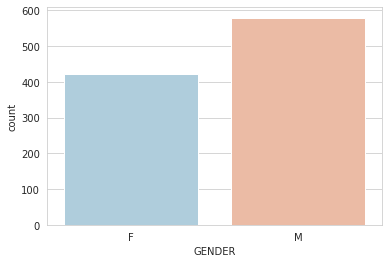

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# load the tips dataset present by default in seaborn
sns.set_style('whitegrid')

# make a countplot
sns.countplot(x='GENDER',data=train,palette='RdBu_r')

In [ ]:
# data overview
train.describe()

,ROW_ID,SUBJECT_ID,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19774.888000,24687.885000,0.665000,25508.516000,24687.885000,149999.458000,0.165000,0.989000
std,11272.786471,18158.488381,0.472227,14490.284071,18158.488381,28884.903681,0.371366,0.104355
min,61.000000,68.000000,0.000000,69.000000,68.000000,100030.000000,0.000000,0.000000
25%,10099.750000,10672.750000,0.000000,13050.250000,10672.750000,125618.500000,0.000000,1.000000
50%,20092.000000,21289.000000,1.000000,25987.500000,21289.000000,150052.000000,0.000000,1.000000
75%,29512.750000,31415.750000,1.000000,38203.750000,31415.750000,174600.500000,0.000000,1.000000
max,41904.000000,82211.000000,1.000000,53375.000000,82211.000000,199951.000000,1.000000,1.000000


In [ ]:
train.drop(['DOB','DOD','DIAGNOSIS'],axis=1,inplace=True)
train.head()

,ROW_ID,SUBJECT_ID,GENDER,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,HADM_ID,ADMITTIME,...,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,637,674,F,2195-02-17 00:00:00,2195-02-17 00:00:00,1,830,674,130960,6/19/2193 19:40,...,REHAB/DISTINCT PART HOSP,Medicare,ENGL,JEWISH,MARRIED,WHITE,6/19/2193 18:06,6/19/2193 20:51,0,1
1,664,705,M,2156-08-26 00:00:00,2156-08-26 00:00:00,1,869,705,113494,8/23/2156 0:43,...,DEAD/EXPIRED,Medicare,NaN,UNOBTAINABLE,NaN,ASIAN,8/22/2156 21:03,8/23/2156 4:32,1,1
2,665,707,F,NaN,2116-01-04 00:00:00,1,870,707,140286,2/28/2115 21:20,...,SNF,Medicare,NaN,UNOBTAINABLE,SINGLE,WHITE,2/28/2115 16:38,2/28/2115 22:19,0,1
3,669,711,M,NaN,2185-05-26 00:00:00,1,878,711,158767,3/22/2185 9:47,...,HOSPICE-HOME,Medicare,ENGL,JEWISH,MARRIED,WHITE,3/22/2185 6:59,3/22/2185 11:14,0,1
4,683,726,F,2123-07-16 00:00:00,2123-07-16 00:00:00,1,895,726,148109,7/1/2123 18:59,...,DEAD/EXPIRED,Medicare,NaN,NOT SPECIFIED,MARRIED,WHITE,7/1/2123 14:54,7/1/2123 20:15,1,1


In [ ]:
train.dropna()

,ROW_ID,SUBJECT_ID,GENDER,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,HADM_ID,ADMITTIME,...,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
26,517,546,F,2127-04-07 00:00:00,2127-04-07 00:00:00,1,686,546,107882,4/1/2127 16:33,...,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,WHITE,4/1/2127 12:02,4/1/2127 17:41,1,1
62,1473,1556,F,2155-03-18 00:00:00,2155-03-18 00:00:00,1,1892,1556,129719,3/2/2155 17:03,...,DEAD/EXPIRED,Medicaid,SPAN,CATHOLIC,SINGLE,HISPANIC OR LATINO,3/2/2155 11:27,3/2/2155 19:10,1,1
79,2166,2286,M,2162-04-12 00:00:00,2162-04-12 00:00:00,1,2769,2286,122327,3/25/2162 0:14,...,DEAD/EXPIRED,Medicare,CAPE,CATHOLIC,WIDOWED,WHITE,3/24/2162 22:40,3/25/2162 3:20,1,1
133,5185,5476,F,2139-12-05 00:00:00,2139-12-05 00:00:00,1,6660,5476,199622,12/5/2139 14:55,...,DEAD/EXPIRED,Medicare,ENGL,JEWISH,WIDOWED,WHITE,12/5/2139 11:50,12/5/2139 16:19,1,1
134,5203,5494,M,2147-10-21 00:00:00,2147-10-21 00:00:00,1,6681,5494,138109,10/15/2147 16:04,...,DEAD/EXPIRED,Medicare,RUSS,JEWISH,MARRIED,WHITE,10/15/2147 13:12,10/15/2147 17:34,1,1
160,6916,7310,F,2173-09-14 00:00:00,2173-09-14 00:00:00,1,8942,7310,148664,9/14/2173 3:48,...,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,9/14/2173 0:14,9/14/2173 5:16,1,1
230,10071,10642,F,2195-05-29 00:00:00,2195-05-29 00:00:00,1,13018,10642,122948,5/27/2195 18:33,...,DEAD/EXPIRED,Medicaid,ENGL,NOT SPECIFIED,SINGLE,WHITE,5/27/2195 15:38,5/27/2195 19:21,1,1
255,10603,11209,M,2149-12-06 00:00:00,2149-12-06 00:00:00,1,13712,11209,179176,12/6/2149 12:11,...,DEAD/EXPIRED,Medicare,CANT,NOT SPECIFIED,MARRIED,ASIAN,12/6/2149 10:54,12/6/2149 14:25,1,1
306,11857,12530,M,2170-01-05 00:00:00,2170-01-05 00:00:00,1,15371,12530,107003,12/31/2169 20:45,...,DEAD/EXPIRED,Medicare,RUSS,JEWISH,MARRIED,WHITE,12/31/2169 18:03,12/31/2169 23:26,1,1
343,18723,19833,M,2199-02-26 00:00:00,2199-02-26 00:00:00,1,24224,19833,193540,2/22/2199 22:41,...,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2/22/2199 19:30,2/22/2199 23:19,1,1


In [ ]:
train.drop(['RELIGION'],axis=1,inplace=True)
train.head()

,ROW_ID,SUBJECT_ID,GENDER,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.1,SUBJECT_ID.1,HADM_ID,ADMITTIME,...,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,637,674,F,2195-02-17 00:00:00,2195-02-17 00:00:00,1,830,674,130960,6/19/2193 19:40,...,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,ENGL,MARRIED,WHITE,6/19/2193 18:06,6/19/2193 20:51,0,1
1,664,705,M,2156-08-26 00:00:00,2156-08-26 00:00:00,1,869,705,113494,8/23/2156 0:43,...,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,NaN,ASIAN,8/22/2156 21:03,8/23/2156 4:32,1,1
2,665,707,F,NaN,2116-01-04 00:00:00,1,870,707,140286,2/28/2115 21:20,...,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,SINGLE,WHITE,2/28/2115 16:38,2/28/2115 22:19,0,1
3,669,711,M,NaN,2185-05-26 00:00:00,1,878,711,158767,3/22/2185 9:47,...,EMERGENCY ROOM ADMIT,HOSPICE-HOME,Medicare,ENGL,MARRIED,WHITE,3/22/2185 6:59,3/22/2185 11:14,0,1
4,683,726,F,2123-07-16 00:00:00,2123-07-16 00:00:00,1,895,726,148109,7/1/2123 18:59,...,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,MARRIED,WHITE,7/1/2123 14:54,7/1/2123 20:15,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                1000 non-null   int64 
 1   SUBJECT_ID            1000 non-null   int64 
 2   GENDER                1000 non-null   object
 3   DOD_HOSP              464 non-null    object
 4   DOD_SSN               565 non-null    object
 5   EXPIRE_FLAG           1000 non-null   int64 
 6   ROW_ID.1              1000 non-null   int64 
 7   SUBJECT_ID.1          1000 non-null   int64 
 8   HADM_ID               1000 non-null   int64 
 9   ADMITTIME             1000 non-null   object
 10  DISCHTIME             1000 non-null   object
 11  DEATHTIME             165 non-null    object
 12  ADMISSION_TYPE        1000 non-null   object
 13  ADMISSION_LOCATION    1000 non-null   object
 14  DISCHARGE_LOCATION    1000 non-null   object
 15  INSURANCE             1000 non-null   o

In [ ]:
train = pd.read_csv('./patients with PNEUMONIA.csv')

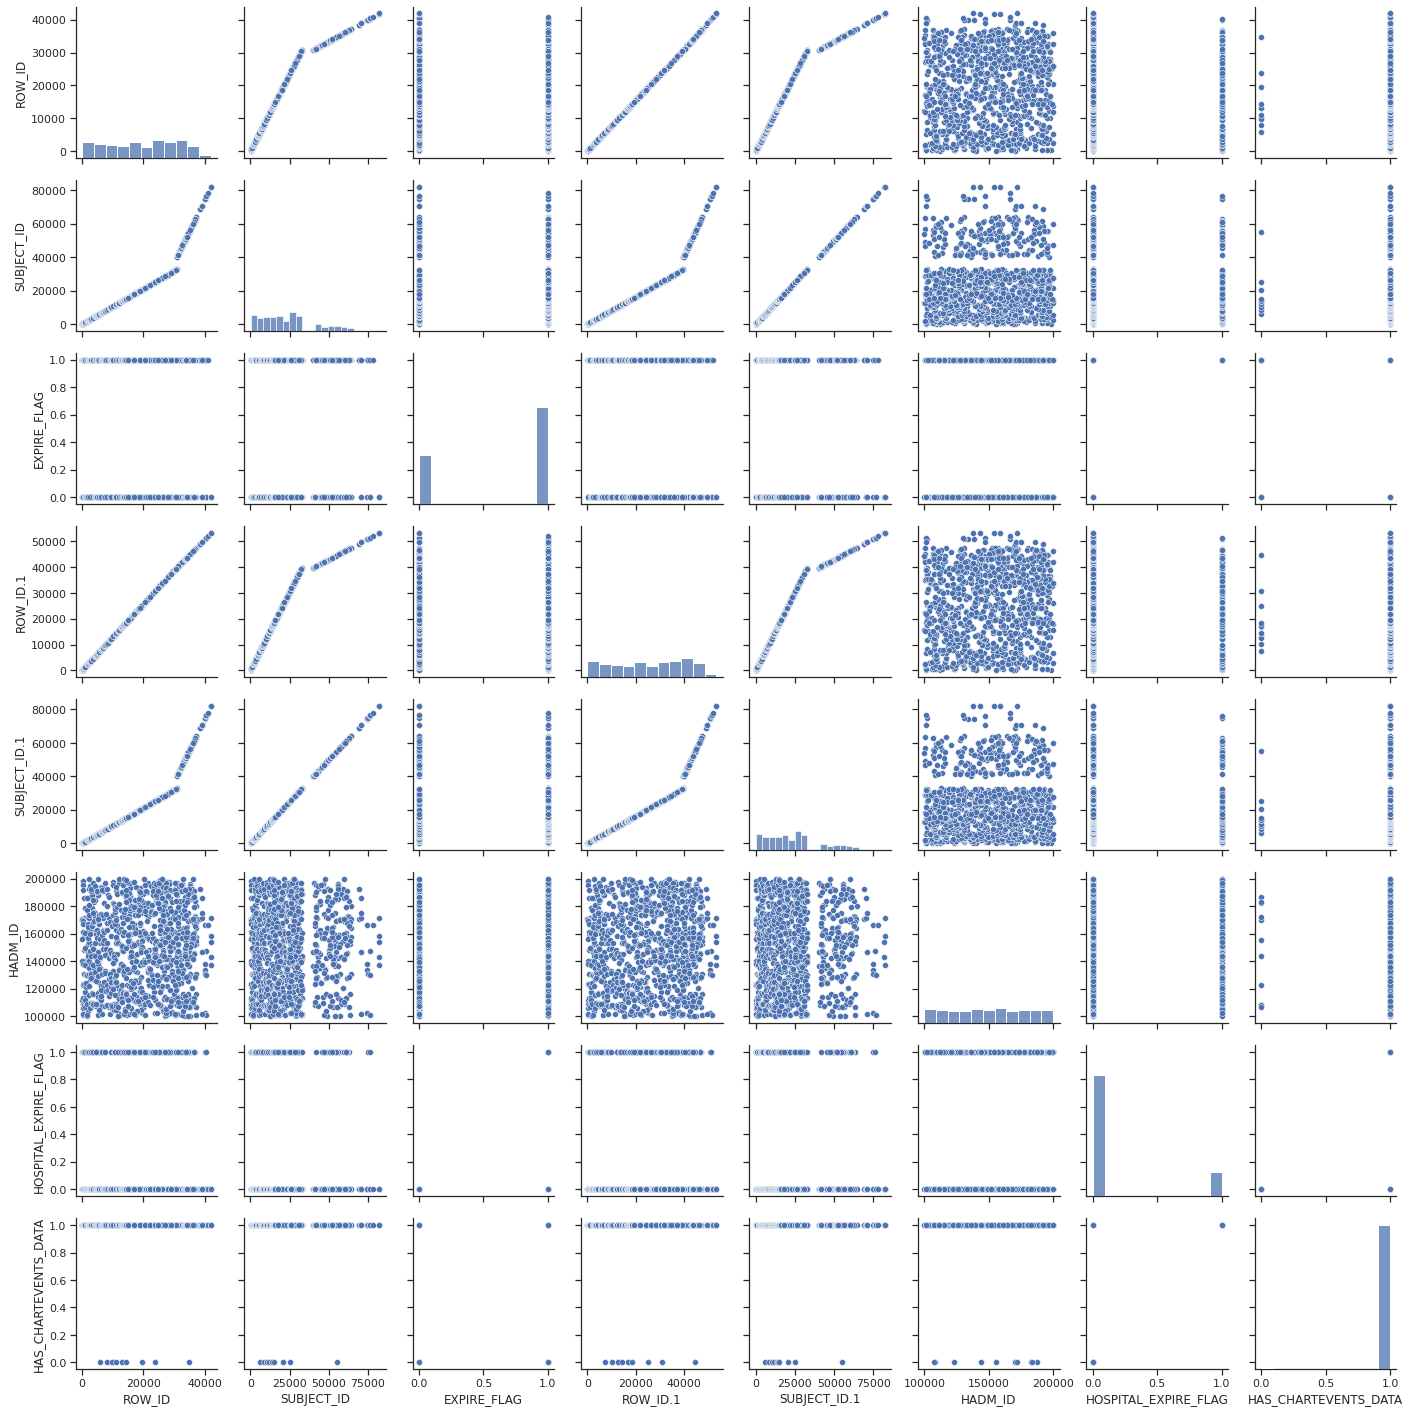

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train)
plt.show()

# Step3: Build a Linear Regression

scikit-learn makes it very easy to divide our data set into training data and test data. To do this, we’ll need to import the function train_test_split from the model_selection module of scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Step4: Logistic Regression/ Splitting Data


The first thing we need to do is split our data into an x-array (which contains the data that we will use to make predictions) and a y-array (which contains the data that we are trying to predict.

First, we should decide which columns to include. You can generate a list of the DataFrame’s columns using train.columns, which outputs:

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
def convert_to_binary(x):
    if x == "PNEUMONIA":
        return 1
    else : return 0

In [ ]:
x = train['SUBJECT_ID'].astype(float)
y = train['DIAGNOSIS'].apply(lambda x: convert_to_binary(x))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: DIAGNOSIS, Length: 1000, dtype: int64

# Step5: Model Development & Training

Building and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

Next, we need to create an instance of the Linear Regression Python object. We will assign this to a variable called model

In [ ]:
x = np.array([2.0 , 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7])
y = np.array([196, 221, 136, 255, 244, 230, 232, 255, 267])

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [ ]:
print(lr.predict([[2.4]]))

[198.36539227]


In [ ]:
print(lr.fit)

<bound method LinearRegression.fit of LinearRegression()>


# Step6: Prediction

scikit-learn makes it very easy to make predictions from a machine learning model. You simply need to call the predict method on the model variable that we created earlier.

The predictions variable holds the predicted values of the features stored in x_test. Since we used the train_test_split method to store the real values in y_test, what we want to do next is compare the values of the predictions array with the values of y_test.

In [ ]:
x= x.reshape(-1, 1)
y= y.reshape(-1, 1)

In [ ]:
x_test=x.reshape(-1,1)

In [ ]:
y_test=y.reshape(-1,1)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
predictions=lr.predict(y_test)

An easy way to do this is plot the two arrays using a scatterplot. It’s easy to build matplotlib scatterplots using the plt.scatter method. Here’s the code for this:

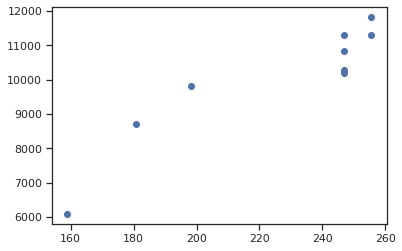

In [ ]:
plt.scatter(y_pred, predictions)


(array([3., 1., 2., 1., 0., 1., 0., 0., 0., 1.]),
 array([-11581.11051374, -11014.59056153, -10448.07060932,  -9881.55065711,
         -9315.0307049 ,  -8748.51075269,  -8181.99080048,  -7615.47084827,
         -7048.95089606,  -6482.43094385,  -5915.91099164]),
 <a list of 10 Patch objects>)

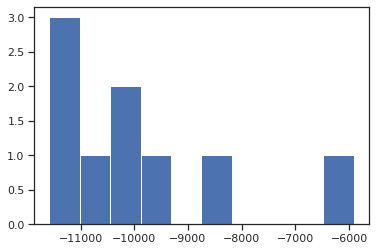

In [ ]:
plt.hist(y_pred - predictions)

# Step7: Model Evaluation

1.Classification Report

There are three main performance metrics used for regression machine learning models:We use RMSE and use NumPy’s sqrt method to easily calculate it:

Mean absolute error Mean squared error Root mean squared error

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']

In [ ]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



2.Confusion Matrix

Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix is such that is equal to the number of observations known to be in group and predicted to be in group .

Thus in binary classification, the count of true negatives is , false negatives is , true positives is and false positives is .

In [ ]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not diagnosis', 1:'diagnosis'}, index={0:'Not diagnosis', 1:'diagnosis'}, inplace=True)
df_cm

,Not diagnosis,diagnosis,2
Not diagnosis,1,0,0
diagnosis,1,0,0
2,0,1,2


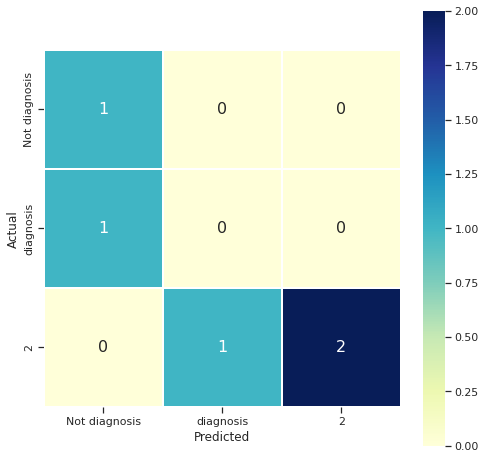

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

3.Logistic Function Plot

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
linreg = LinearRegression()
linreg.fit(y_pred,predictions)

ValueError: ignored

In [ ]:
y_pred = linreg.predict(x_test)

NotFittedError: ignored

In [ ]:
coef = y_pred.coef_
coef

In [ ]:
coef = coef.flatten()
coef

In [ ]:
intercept = model.intercept_
intercept

In [ ]:
x = np.linspace(0, 200)

p = 1/(1 + np.exp(-(coef*x + intercept)))

fig, ax = plt.subplots(figsize=(12,8))

alpha = 0.5
ax.fill_between(x=x, y1=0.5, y2=1, facecolor='#30A2DA', alpha=alpha)
ax.fill_between(x=x, y1=0, y2=0.5, facecolor='#FC4F30', alpha=alpha)
red_patch = mpatches.Patch(color='#30A2DA', alpha=alpha, label='diagnosis')
blue_patch = mpatches.Patch(color='#FC4F30', alpha=alpha, label='Not diagnosis')

sns.scatterplot(data=data, x='SUBJECT_ID', y='DIAGNOSIS', color='#6D904F', s=100, ax=ax)
sns.lineplot(x=x, y=p, linewidth=5, color='black', ax=ax)

ax.set_title('Diagnosis Prediction using Simple Logistic Regression')
ax.set_yticks(np.linspace(0,1,11))
ax.set_ylabel('Diagnosis probability')
ax.grid(False, axis='x')

ax.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [ ]:
x = np.linspace(0, 200)

p = 1/(1 + np.exp(-(coef*x + intercept)))

fig, ax = plt.subplots(figsize=(12,8))

alpha = 0.5
ax.fill_between(x=x, y1=0.5, y2=1, facecolor='#30A2DA', alpha=alpha)
ax.fill_between(x=x, y1=0, y2=0.5, facecolor='#FC4F30', alpha=alpha)
red_patch = mpatches.Patch(color='#30A2DA', alpha=alpha, label='diagnosis')
blue_patch = mpatches.Patch(color='#FC4F30', alpha=alpha, label='Not diagnosis')
green_patch = mpatches.Patch(color='#6D904F', alpha=alpha, label='Data Density')

# data density plot
sns.kdeplot(data=data, x='SUBJECT_ID', y='DIAGNOSIS', color='#6D904F', fill=True, ax=ax)

# I get this number from inverse function where y = 0.5
ax.axvline(142.794, linewidth=2, linestyle='dashed', color='black', alpha=0.5)

# logistic function plot
sns.lineplot(x=x, y=p, linewidth=5, color='black', ax=ax)

ax.set_title('Diagnosis Prediction using Simple Logistic Regression')
ax.set_yticks(np.linspace(0,1,11))
ax.set_ylabel('Diagnosis probability')
ax.set_ylim(0, 1)
ax.set_xlim(0, data['PNEUMONIA'].max()+1)
ax.grid(False, axis='x')

ax.legend(handles=[red_patch, blue_patch, green_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()